<div class="alert alert-info" role="alert">
 <p class ="lead"> 
 <h1>F√≠sica estad√≠stica </h1>
 <h2>Tarea 1</h2>
 <h3>Autor: Aquino Chapa Martha Abril<h3>
 </div>
 
 Hecho en Julia üî¥üü¢üü£


In [1]:
using Plots
using LaTeXStrings
using DelimitedFiles
using ExcelFiles
using XLSX
using DataFrames
using StatsBase

#### Ejercicio 1:

Genera una gr√°fica de la frecuencia de soles $f(1)$ contra el n√∫mero de volados $n$ que haz lanzado
hasta ese momento. Usa los datos obtenidos de:

a) 100 volados (Kerrich hizo 10,000 volados, 100 no son tantos).

b) 1000 volados utilizando un generador aleatorio (a computadora).

c) 10,000 volados utilizando un generador aleatorio (a computadora).

**Soluci√≥n:**

a) Lanzando 100 veces una moneda, el n√∫mero de soles obtenidos fuer√≥n 61.

Para las secciones a y b, generamos una funci√≥n que obtenga el n√∫mero de soles (1) en una tirada de $n$ volados.

In [53]:
#Creamos una funci√≥n que nos cuente el n√∫mero de soles que hay en n tiradas aleatorias.
function num_soles(n)
    #El contador inicial de soles es 0
    sol=0
    #Iniciamos un ciclo, cada ciclo corresponde a una tirada
    for i in 1:n
        #Si sale 1, se anexa un sol al contador, si sali√≥ √°guila se suma 0 al contador
       sol+=rand((1,0))
    end
    #Le pedimos a la funci√≥n que nos regrese el n√∫mero totales de soles.
    return sol
end     

num_soles (generic function with 1 method)

Realizamos la gr√°fica de frecuencia

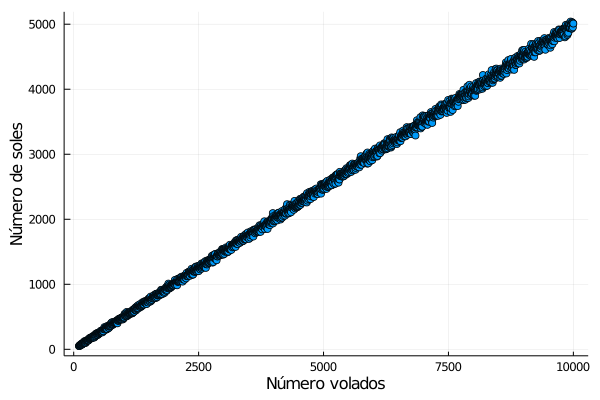

In [54]:
#Definimos el conjunto donde evaluaremos la funci√≥n num_soles, es decir el conjunto de n√∫mero de volados
volados=collect(100:5:10000)
#Creamos un arreglo vac√≠o donde de anexar√°n el n√∫mero de soles correspondiente a los volados del conjunto anterior
soles=[]
#Realizamos un ciclo donde se evalue la funci√≥n num_soles en el i-√©simo elemento de los volados
for i in volados
    #anexamos al arreglo soles, el n√∫mero de soles correspondientes a una tirada de i elementos
    push!(soles,num_soles(i))
end
#Graficamos el n√∫mero de soles en funci√≥n del n√∫mero de tiradas, omitiendo el primer valor que corresponde 100 tiradas
#ya que a ese valor anexaremos el resultado obtenido "mec√°nicamente"
scatter(volados[2:end],soles[2:end],xlabel="N√∫mero volados",ylabel="N√∫mero de soles",marker=(:circle,4))
#Graficamos el resultado obtenido en el inciso a
scatter!(100,61,marker=(:circle,4),color=:red)
plot!(legend=false)

In [55]:
print("Con $(volados[91]) tiradas se obtuvo $(soles[91]) soles.")

Con 550 tiradas se obtuvo 287 soles.

In [56]:
print("Con $(volados[end]) tiradas se obtuvo $(soles[end]) soles.")

Con 10000 tiradas se obtuvo 5010 soles.

#### Ejercicio 4: M√°s de caminantes aleatorios... m√°s alcohol
Para el sistema planteado en el inciso 3a), elabora 1000 listas (1000 caminantes) de 30 pasos cada
una. Utiliza para ello un c√≥digo en tu lenguaje favorito (incluye a tu tarea como ap√©ndice el c√≥digo,
todo en un mismo pdf). Cada una de estas listas est√° conformada por instancias o realizaciones de
las siguientes variables aleatorias $X_i$:

$\{X_1, X_2,X_3, ...,X_{29}, X_{30}\}$
Nota: Para generar estas listas en Python, puedes utilizar la funci√≥n ‚Äúrandom.choices‚Äù. Por ejemplo,
la siguiente funci√≥n regresa un arreglo con 30 realizaciones de n√∫meros al azar de entre {‚àí1, 0, 1},
donde las probabilidades son 1/3 para cada una de ellas:
random.chices ([ ‚àí1 , 0 , 1] , w eig h t s = (1/3 ,1/3 ,1/3 ) , k=30).

Cada uno de estos elementos es la magnitud de un paso, es decir, cada uno de los elementos $X_i$ de
la ec (2). Para obtener la trayectoria de la caminata lo  ÃÅunico que tienes que hacer es ir sumando
sucesivamente cada uno de estos elementos (la posici√≥n final de la caminata es, entonces, la suma
total de todos esos resultados).

Nota que cada una de estas 1000 caminatas podemos entenderla como una realizaci√≥n de la variable
aleatoria $Y_i$ como la definimos en la ec. (1). De esta manera, esperamos que si tom√°ramos un n√∫mero
infinito de realizaciones (es decir, caminatas), recobrar√≠amos la estad√≠stica que obtuviste en el inciso
3a). Pero, ¬øqu√© pasar√≠a si el n√∫mero de realizaciones es finito? Veamos:

a) Gr√°fica 20 de las (1000) listas junto con la desviaci√≥n est√°ndar de la expresi√≥n anal√≠tica que
encontraste para este sistema en el inciso 3a).

Iniciamos definiendo una funci√≥n que nos diga si el caminante va hacia adelante o atr√°s en su n-√©simo paso.

In [2]:
#Definimos una funci√≥n que nos simule una caminata de n pasos
function caminata(n)
    #Definimos los valores que puede tomar la caminata
    valores = [1,-1,0]
    #Definimos la probabilidad de cada valor
    probabilidad = [1/3,1/3,1/3]
    #Definimos un arreglo vac√≠o que iremos llenando con los valores de la caminata
    pasos=[]
    #Iniciamos suponiendo que el caminante est√° en el paso 0 en 0
    push!(pasos,0)
    #Realizamos un ciclo donde se escoja de manera "aleatoria" si el caminante dio un paso adelante, atr√°s o no se movi√≥
    push!(pasos,0)
    for i in 1:n
        #Definimos el paso en base a los valores que puede tomar y su probabilidad
        paso=sample(valores, Weights(probabilidad))
        #Anexamos la informaci√≥n del paso al arreglo pasos
        push!(pasos,paso)
    end
    #Le pedimos a la funci√≥n que regrese la informaci√≥n de los pasos.
    return pasos
end

caminata (generic function with 1 method)

Aplicamos esta funci√≥n $caminata$ 10000 veces, para caminatas de 30 pasos.

In [3]:
#Generamos una matriz donde la i-√©sima columna corresponde a la i-√©sima caminata
caminatas=zeros(31,1000)
#Generamos un ciclo para llenar las entradas de la matriz
for i in 1:1000
    for j in 1:31
    caminatas[j,i]=caminata(30)[j]
    end
end

Definimos ahora una funci√≥n que nos de la posici√≥n.

In [4]:
#Listas son los arreglos de los pasos, f el n√∫mero de pasos y c el n√∫mero de columnas o caminantes
function posicion(listas,f,c)
    #Definimos una matriz donde anexaremos la funci√≥n de la posici√≥n
    posicion=zeros(f,c)
    #Realizamos un ciclo para llenar cada columna de la matriz, que representada cada caminata
    for i in 1:c
        #Definimos la primera posicion para cada caminata, la cual corresponde al primer valor de la caminata
        posicion[1,i]=listas[1,i]
        #Abrimos un ciclo para encontrar la j-√©sima posici√≥n de la i-√©sima caminata
        for j in 2:f
            posicion[j,i]=listas[j,i]+posicion[j-1,i]
        end
    end
    #Le pedimos a la funci√≥n que no
    return posicion
end

posicion (generic function with 1 method)

Aplicamos la funci√≥n anterior a las caminatas obtenidas anteriormente

In [5]:
posiciones=posicion(caminatas,31,1000);

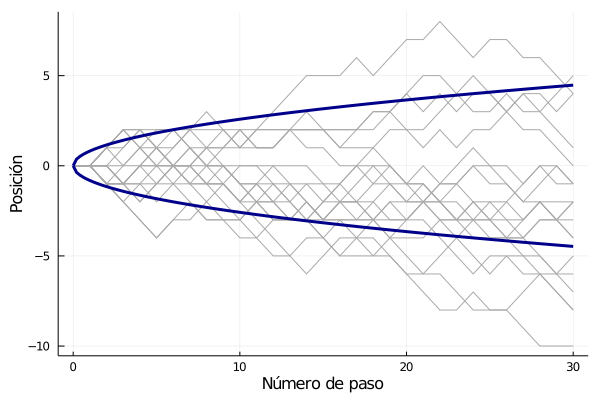

In [6]:
#Definimos el arreglo donde evaluaremos la expresi√≥n anal√≠tica de la desviaci√≥n est√°ndar
n=collect(0:0.2:30)
#Obtenemos el valor de la desviaci√≥n est√°ndar en el n-√©simo paso
des_estandar=(2*n/3).^(1/2)
#Definimos el arreglo que corresponde al n√∫mero de pasos con lo que gr√°ficaremos la posici√≥n
pas=collect(0:1:30)
#Graficamos las posiciones de los caminantes
plot(xlabel="N√∫mero de paso",ylabel="Posici√≥n")
#Gr√°ficamos las posiciones de las primeras 20 caminatas
for j in 1:20
    plot!(pas,posiciones[:,j],label=false,color = :darkgrey)
end
#Graficamos la desviaci√≥n est√°ndar
plot!(n,des_estandar,lw = 3,label=false,color = :bluesreds)
plot!(n,-des_estandar,lw = 3,label=false,color=:bluesreds)
plot!()

Ahora, considerando los siguientes grupos de listas, calcula el promedio de la posici√≥n como
funci√≥n del n√∫mero de pasos y graf√≠calo.

* i Grupo 1: Incluye 5 caminatas.
* ii Grupo 2: Incluye 100 caminatas.
* iii Grupo 3: Incluye 500 caminatas.
* iv  Grupo 4: Incluye 1000 caminatas. 

Nota: Por ejemplo, para obtener el promedio de la posici√≥n dado el primer paso i = 1, del Grupo 1, necesitas sumar el primer elemento de cada una de las cinco primeras caminatas. Para obtener el promedio de la posici√≥n dados los primeros dos pasos del Grupo 1, necesitas sumar los segundos elementos de cada una de las cinco primeras caminatas; y as√≠ sucesivamente (como ejemplo, puedes ver la Tabla 1).

In [16]:
#Definimos una funci√≥n para obtener el promedio de la posici√≥n
function promedio(posicion,n)
    #Definimos un arreglo para obtener el promedio de la posici√≥n
    promedio=zeros(31)
    #Realizamos un arreglo donde se obtendr√° el promedio en el i-√©simo paso
    for i in 1:31
        for j in 1:n
            promedio[i]+=posicion[i,j]
        end
    end
    #Regresamos el valor promedio, donde se anul√≥ el elemento del paso 0, debido a que s√≥lo se a anexado por formalidad
    return promedio*(1/n)
end

promedio (generic function with 1 method)

In [25]:
#Obtenemos el promedio de las posiciones obtenidas anteriormente
promedios=promedio(posiciones[:,1:6],6);

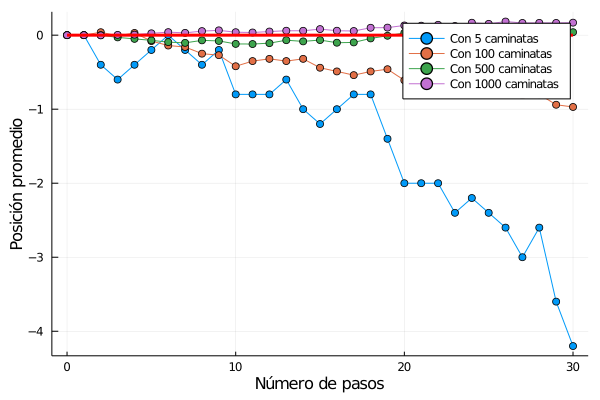

In [37]:
#Definimos los conjuntos de caminantes donde gr√°ficaremos los resultados
caminantes=(5,100,500,1000)
#Definimos un arreglo de ceros para generar una l√≠nea promedio en 0
cero=zeros(31)
#Graficamos la funci√≥n para los caminantes anteriores
plot(xlabel="N√∫mero de pasos",ylabel="Posici√≥n promedio")
for j in caminantes
    plot!(pas,promedio(posiciones[:,1:j],j),marker=:dot,label="Con $(j) caminatas")
end
plot!(collect(0:1:30),cero,lw=3,color = :red,label=false)
plot!()

Para la varianza, generamos una funci√≥n que obtenga el valor de esta.

In [39]:
function varianza(pasos,c)
    promedios=promedio(pasos,c)
    var=zeros(31)
    for i in 1:31
        var[i]=0
        for j in 1:c
            var[i]+=(pasos[i,j]-(promedios[i]))^2
        end
    end
    return var/c
end

varianza (generic function with 1 method)

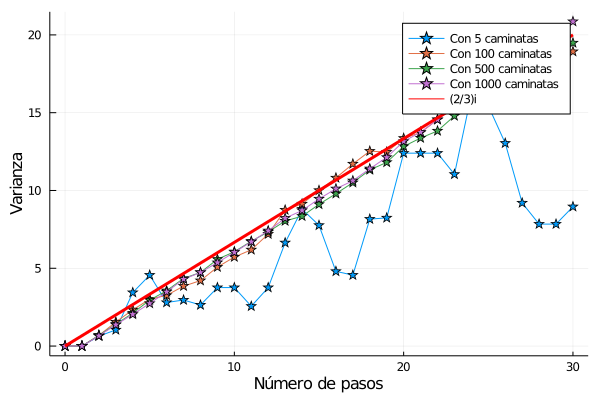

In [52]:
#Definimos el conjunto donde evaluaremos la varianza anal√≠tica
x=collect(0:0.5:30)
#Obtenemos la varianza analitica
var_analitica=(2/3)*x
#Graficamos la varianza para diversos conjuntos de caminatas
plot(xlabel="N√∫mero de pasos",ylabel="Varianza")
for j in caminantes
    plot!(pas,varianza(posiciones[:,1:j],j),marker=(:star,5),label="Con $(j) caminatas")
end
plot!(x,var_analitica,lw=3,color = :red,label="(2/3)i")
plot!()